<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/ridge_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,noise=20,random_state=42,n_targets=1)

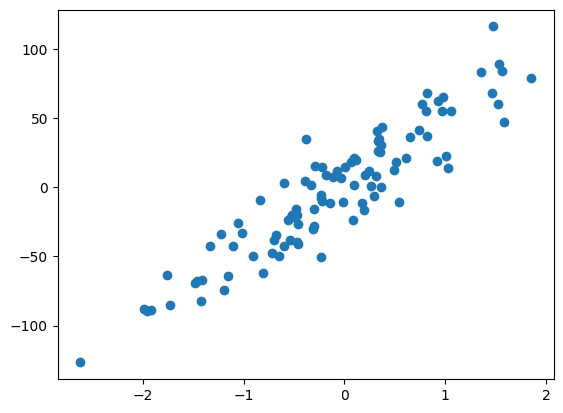

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_,lr.intercept_)

[47.13323967] 2.3302306410539453


In [6]:
from sklearn.linear_model import Ridge

In [12]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_,rr.intercept_)

[41.9906212] 1.7961876226164746


In [13]:
rr1= Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_,rr1.intercept_)

[21.18627364] -0.3642714175995887


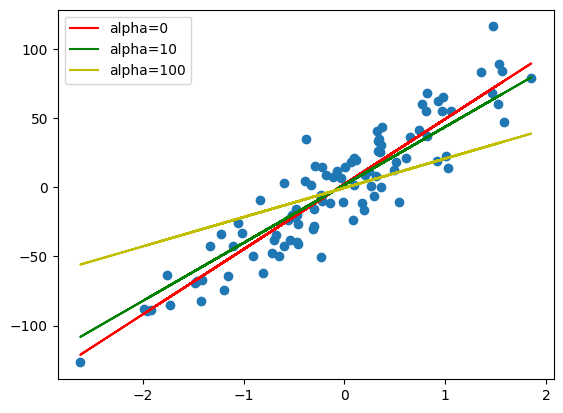

In [19]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),'r',label='alpha=0')
plt.plot(X,rr.predict(X),'g',label='alpha=10')
plt.plot(X,rr1.predict(X),'y',label='alpha=100')
plt.legend()

# Making own Ridge Regression Class from Scratch for 2D dataset

In [20]:
class MeraRidge:

  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.m = None
    self.b = None

  def fit(self,X_train,y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num + (y_train[i]-y_train.mean()) * (X_train[i] - X_train.mean())
      den = den + (X_train[i] - X_train.mean())**2
    self.m = num/(den+self.alpha)
    self.b =y_train.mean() - (self.m*X_train.mean())

    print(self.m,self.b)


  def predict(self,X_test):
    pass

In [22]:
reg = MeraRidge(alpha=100)
reg.fit(X,y)

[21.18627364] [-0.36427142]


# For n-Dim Dataset

In [23]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [24]:
X,y = load_diabetes(return_X_y=True)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
from sklearn.linear_model import Ridge

In [27]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [28]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [30]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.45199494197195456

In [32]:
print(reg.coef_)
print(reg.intercept_)

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
151.92546856900984


In [40]:
class MeraRidge:

  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    I = np.identity(X_train.shape[1])
    I[0][0] = 0
    print(I)
    result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha*I).dot(X_train.T).dot(y_train)
    self.intercept_ = result[0]
    self.coef_ = result[1:]

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [41]:
reg = MeraRidge(alpha=0.1)
reg.fit(X_train,y_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [42]:
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

0.45199494197195456


In [43]:
print(reg.coef_)
print(reg.intercept_)

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
151.9254685690099
